In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns

In [3]:
X, y, cof = make_regression(n_samples=500, n_features=1, bias=4.2, noise=5.1, coef=True)
print(X.shape, y.shape, cof)

(500, 1) (500,) 84.56175384970128


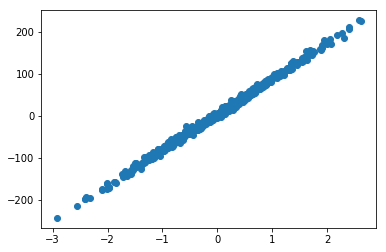

In [4]:
plt.figure()
plt.scatter(X, y)
plt.show()

In [5]:
class LinearRegression:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.coef = np.random.uniform(low=-1, high=1)
        self.bias = np.random.random()
        
    def hypothesis(self, x):
        return self.coef * x + self.bias
    
    def gradient_descent(self, lr=0.1):
        dw1 = 0
        dw0 = 0
        n = self.X.shape[0]
        for x,y in zip(self.X, self.y):
            pred = self.hypothesis(x)
            dw1 += (pred - y) * x
            dw0 += (pred - y)
        dw1 /= n
        dw0 /= n
        
        self.coef = self.coef - lr * dw1
        self.bias = self.bias - lr * dw0
        
    def loss(self):
        losses = []
        for x,y in zip(self.X, self.y):
            losses.append((y - self.hypothesis(x)) ** 2)
        losses = np.array(losses)
        return losses.sum() / (2 * len(losses))
    
    def run(self, losses, epoch=2):
        for _ in range(epoch):
            self.gradient_descent()
            losses.append(self.loss())
        plt.figure()
        plt.plot(losses)
        plt.show()
        
        yhat = []
        for x in X:
            yhat.append(lr.hypothesis(x))
        plt.figure()
        plt.scatter(X, y)
        yhat = np.array(yhat)
        plt.plot(X, yhat, 'r')
        plt.show()
        return losses

In [6]:
lr  = LinearRegression(X, y)

In [7]:
losses = [lr.loss()]

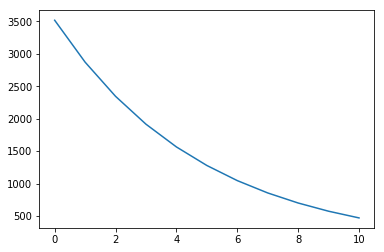

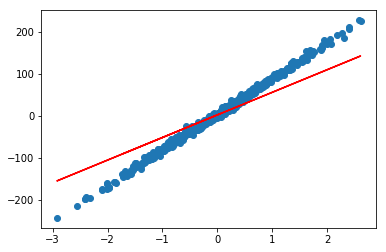

In [8]:
losses = lr.run(losses, 10)

In [279]:
class MultiVariateLinearRegression:
    def __init__(self, X, y):
        self.X = X#(X - X.mean(axis=0)) / X.std(axis=0)
        self.y = y
        self.N, self.dim = self.X.shape[0], self.X.shape[1]
        self.coef = np.random.uniform(low=-1, high=1, size=(self.dim,))
        self.bias = np.random.random()
        
    def hypothesis(self, x):
        return (self.coef.dot(x) + self.bias)
    
    def get_predictions(self, test):
        preds = []
        for t in test:
            preds.append(self.hypothesis(t))
        preds = np.array(preds)
        return preds
    
    def gradient_descent(self, lr=0.01):
#         gradients = np.zeros((self.X.shape))
        gradients = np.zeros_like(self.coef)
        intercept = 0
        yhat = self.get_predictions(self.X)
        '''
        for j in range(self.dim):
            for i in range(self.N):
#                 yhat = self.hypothesis(self.X[i].reshape((-1,1)))
#                 gradients[i,j] = (yhat - self.y[i]) * self.X[i,j]
                gradients[i,j] = (yhat[i] - self.y[i]) * self.X[i,j]
        '''        
#         for i in range(self.N):
#             yhat = self.hypothesis(self.X[i].reshape((-1,1)))
#             intercept += (yhat - self.y[i])
#             intercept += (yhat[i] - self.y[i])
        intercept = (yhat - self.y).sum() / self.N
        
        
        for j in range(self.dim):
            gradients[j] = ((yhat - self.y) * self.X[:, j]).sum() / self.N
#             gradients[j] = ((yhat.reshape((-1,1)) - self.y.reshape((-1,1))) * self.X[:, j]).sum() / self.N
            
#         gradients = gradients.sum(axis=0).reshape((-1,1))
#         intercept = intercept[0]    

        
        self.coef = self.coef - (lr * gradients)
        self.bias = self.bias - (lr * intercept)
    
        
    def loss(self):
        yhat = self.get_predictions(self.X)
        loss = ((self.y - yhat)**2).sum()/(2*self.N)
        return loss
    
    def run(self, losses, epoch=2):
        print(self.coef)
        print(self.bias)
        for _ in range(epoch):
            self.gradient_descent()
            losses.append(self.loss())
        plt.figure()
        plt.plot(losses)
        plt.show()
        
        return losses

In [280]:
m = MultiVariateLinearRegression(X_train, y_train)
yhat = m.get_predictions(X_train)
yhat.shape


(404,)

In [281]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()

In [282]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [283]:
from sklearn.linear_model import LinearRegression as SKLinearRegression

sk_linreg = SKLinearRegression()

In [284]:
sk_linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [285]:
# for i in range(X_train.shape[0]):
#     print(sk_linreg.predict(X_train)[i], mvlr.get_predictions(X_train)[i])

In [286]:
sk_linreg.score(X_train, y_train)

0.7312808366842549

In [287]:
sk_linreg.score(X_test, y_test)

0.7611762693246964

In [288]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(sk_linreg, X_train, y_train, cv=20, scoring='r2').mean())
print(cross_val_score(sk_linreg, X_test, y_test, cv=20, scoring='r2').mean())

0.6963856944140265
0.10049667001152238


In [289]:
X_train = (X_train - X_train.mean(axis=0))/X_train.std(axis=0)

In [290]:
mvlr = MultiVariateLinearRegression(X_train, y_train)

In [291]:
mvlr.hypothesis(X_train[100])

0.866449810295517

In [292]:
losses = [mvlr.loss()]

[-0.84514485  0.40395687 -0.68236524  0.92439856 -0.39231468  3.3543129
  0.02863278 -0.85342343 -0.06775399  0.30890848 -1.53111662  0.71744047
 -2.71731372]
19.823533034584788


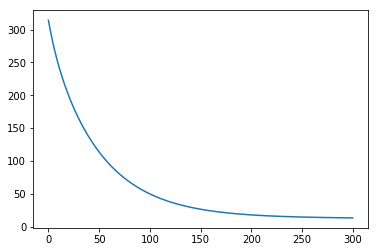

In [295]:
losses = mvlr.run(losses, 100)

In [296]:
mvlr.coef, mvlr.bias

(array([-0.83207666,  0.46845679, -0.60448443,  0.85896136, -0.66685825,
         3.4396276 ,  0.03702161, -1.36839115,  0.20419398,  0.24536338,
        -1.64997169,  0.82690124, -3.02055401]), 21.75210134019463)

In [297]:
sk_linreg.coef_, sk_linreg.intercept_

(array([-1.53009909e-01,  5.48148721e-02,  5.15828828e-02,  2.24241738e+00,
        -2.18748506e+01,  3.77072106e+00,  4.09022285e-03, -1.63773637e+00,
         3.74206162e-01, -1.43979522e-02, -9.71418791e-01,  8.75483808e-03,
        -5.06401852e-01]), 39.70730448007171)

In [298]:
X, y, cof = make_regression(n_samples=500, n_features=1, bias=4.2, noise=5.1, coef=True)
print(X.shape, y.shape, cof)
m1 = MultiVariateLinearRegression(X[:400], y[:400])

(500, 1) (500,) 38.165150479366325


In [299]:
losses = [m1.loss()]

[25.06811658]
2.2978013761043385


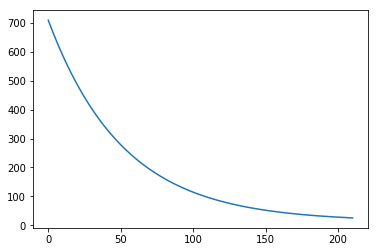

In [302]:
losses = m1.run(losses, 100)

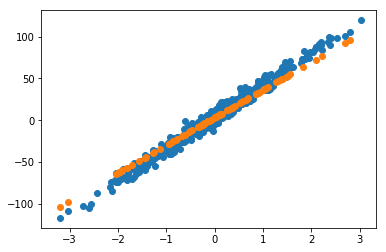

In [303]:
plt.figure()
plt.scatter(X, y)
plt.scatter(X[400:], m1.get_predictions(X[400:]))
plt.show()